####  REPORTING AND ANALYSING ONLINE SHOPPING

##### INTRODUCTION

#### 1. Obtain
here: 
 - we get the dataset
 - we establish the source of data

In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read csv
ecommerce_df = pd.read_csv("data/data.csv", encoding = 'ISO-8859-1')

# inspect the header
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# inspect the tail
ecommerce_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
# lets get to know the shape of our dataset
ecommerce_df.shape

(541909, 8)

#### Scrub
Here, we check on:
 - Completeness/assess gaps in data
 - Consistency
 - Data Integrity/ Uniformity
 - Repeating Values values

In [8]:
# check for missing values and datatype
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- There are missing values in our CustomerID  and Description columns.
- However, we need InvoiceDate object variables to datetime object

In [10]:
# change datatype from object to datetime dtype
ecommerce_df["InvoiceDate"] = pd.to_datetime(ecommerce_df["InvoiceDate"])
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
# fill the customerid missing values with 0
ecommerce_df["CustomerID"].fillna(0, inplace= True)
ecommerce_df["Description"].fillna("N/A", inplace = True)
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# check for duplicate values
duplicated_ecommerce_df = ecommerce_df[ecommerce_df.duplicated(keep = False)]
len(duplicated_ecommerce_df)

10147

In [13]:
# extract non duplicated values to a clean df
clean_ecommerce_df = ecommerce_df[~ecommerce_df.duplicated(keep = False)]
clean_ecommerce_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
# reset index
clean_ecommerce_df.reset_index(drop = True, inplace = True)
clean_ecommerce_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
531757,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
531758,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
531759,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
531760,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
531761,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#### 3. Explore
Your exploration is supported by visualization/ tabulation/ summaries:
What to explore:

- **Tabulation**:
Show totals of broad quantities

- **Summary Statistics**
Describe the characteristics of data (mean, median, std, quartiles)

- **Spread of data**
How is the data dispersed (scatter plots - visual inspection of outliers)

- **Distribution of major variables**
Histogram of singular variables

- **Heatmaps of major variables**
- **Proportions of major variables**

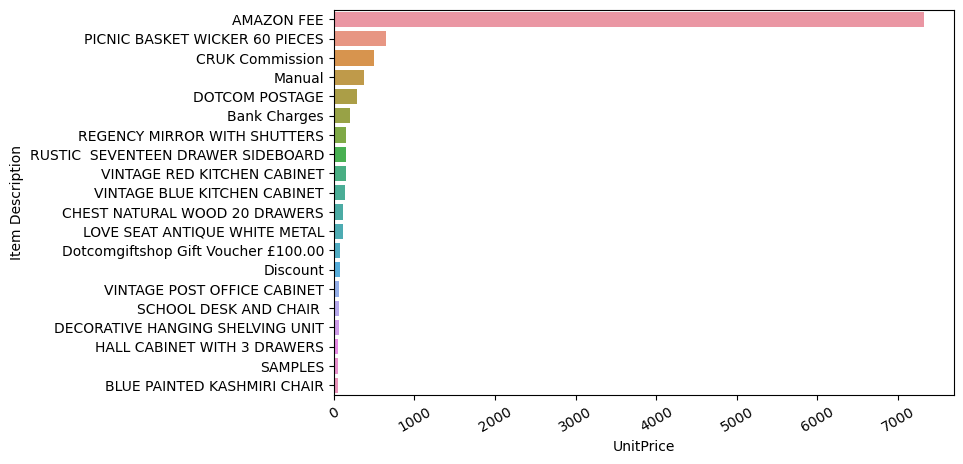

In [16]:
# A bar plot representation of unique item description and their mean unit Price
top_items = clean_ecommerce_df.groupby("Description")["UnitPrice"].mean().nlargest(20).reset_index()
plt.figure(figsize=(8,5))

sns.barplot(data = top_items, x = "UnitPrice", y= "Description")
plt.xticks(rotation=30)
plt.xlabel("UnitPrice")
plt.ylabel("Item Description")
plt.show()

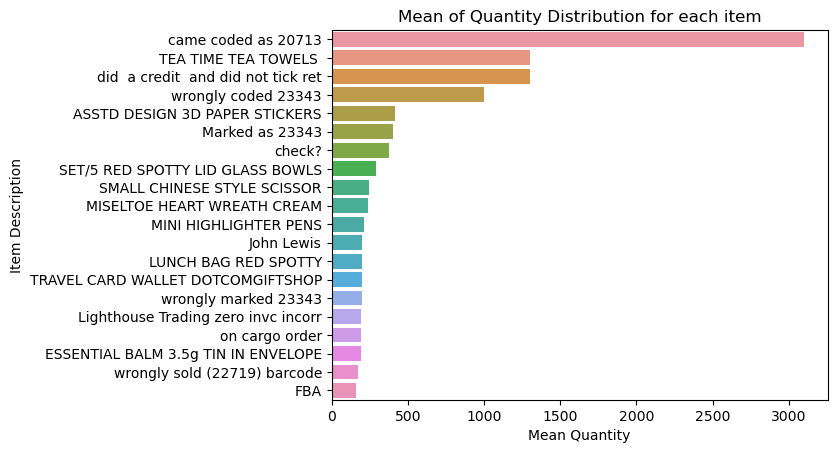

In [17]:
# Quantity distribution of Items.
item_quantity = clean_ecommerce_df.groupby("Description")["Quantity"].mean().nlargest(20).reset_index()

# bar plot representation
sns.barplot(data = item_quantity, x=("Quantity"), y=("Description"))
plt.xlabel("Mean Quantity")
plt.ylabel("Item Description")
plt.title("Mean of Quantity Distribution for each item")
plt.show()

In [33]:
# show a count of unique customerid and their countries 
numberof_customer_by_country_df = clean_ecommerce_df.groupby("Country")["CustomerID"].nunique().nlargest(20).reset_index()

numberof_customer_by_country_df.columns=["Country", "CustomerCount"]
numberof_customer_by_country_df = numberof_customer_by_country_df.sort_values(by="CustomerCount", ascending=False) 
numberof_customer_by_country_df.reset_index(drop=True, inplace=True)
numberof_customer_by_country_df

,Country,CustomerCount
0,United Kingdom,3951
1,Germany,95
2,France,88
3,Spain,31
4,Belgium,25
5,Switzerland,22
6,Portugal,20
7,Italy,15
8,Finland,12
9,Austria,11


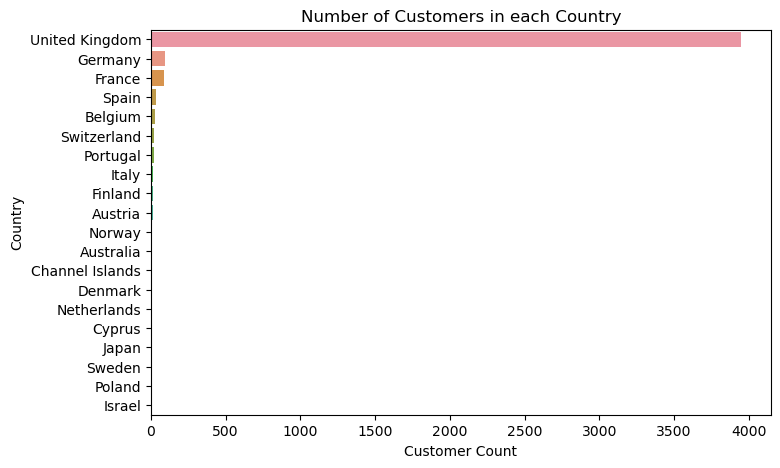

In [35]:
# a bar chart representing Count of Customers by Country
plt.figure(figsize=(8,5))
sns.barplot(data = numberof_customer_by_country_df, x = "CustomerCount", y= "Country")
plt.xlabel("Customer Count")
plt.ylabel("Country")
plt.title("Number of Customers in each Country")
plt.show()

- United Kingdom has the highest number of customers followed by Germany and France respectively.
- The bar graph represents countries with atleast 5 Customers and above while the rest of the countries not represented have 1-4 number of customers represented.